TensorFlow version: 2.19.0
 FRENCH TO TAMIL TRANSLATION SYSTEM
 Using existing dataset files: french.txt and tamil.txt
 Dataset loaded with 29 5-letter French-Tamil pairs

 Sample pairs from your dataset:
   arbre -> மரம்
   fleur -> மலர்
   terre -> பூமி
   solei -> சூரியன்
   pluie -> மழை
   livre -> புத்தகம்
   table -> மேசை
   porte -> கதவு
   fenet -> சாளரம்
   lampe -> விளக்கு

 DATASET ANALYSIS
Total word pairs: 29
Unique French words: 29
Unique Tamil words: 29

French word length - Mean: 5.00, Std: 0.00
Tamil word length - Mean: 5.38, Std: 1.45

Unique French characters: 20
Unique Tamil characters: 26

 Inferred Word Categories:
   • Nature: 4 words
   • Objects: 7 words
   • Colors: 3 words
   • Family: 4 words
   • Food: 2 words
   • Time: 3 words
   • Emotions: 1 words
   • Places: 2 words
   • Other: 3 words
 Neural Network Model Built:
   • Input shape: (29, 5)
   • French characters: 20
   • Tamil characters: 26
 LSTM Model Built:
   • Input shape: (29, 5)
   • LSTM layer

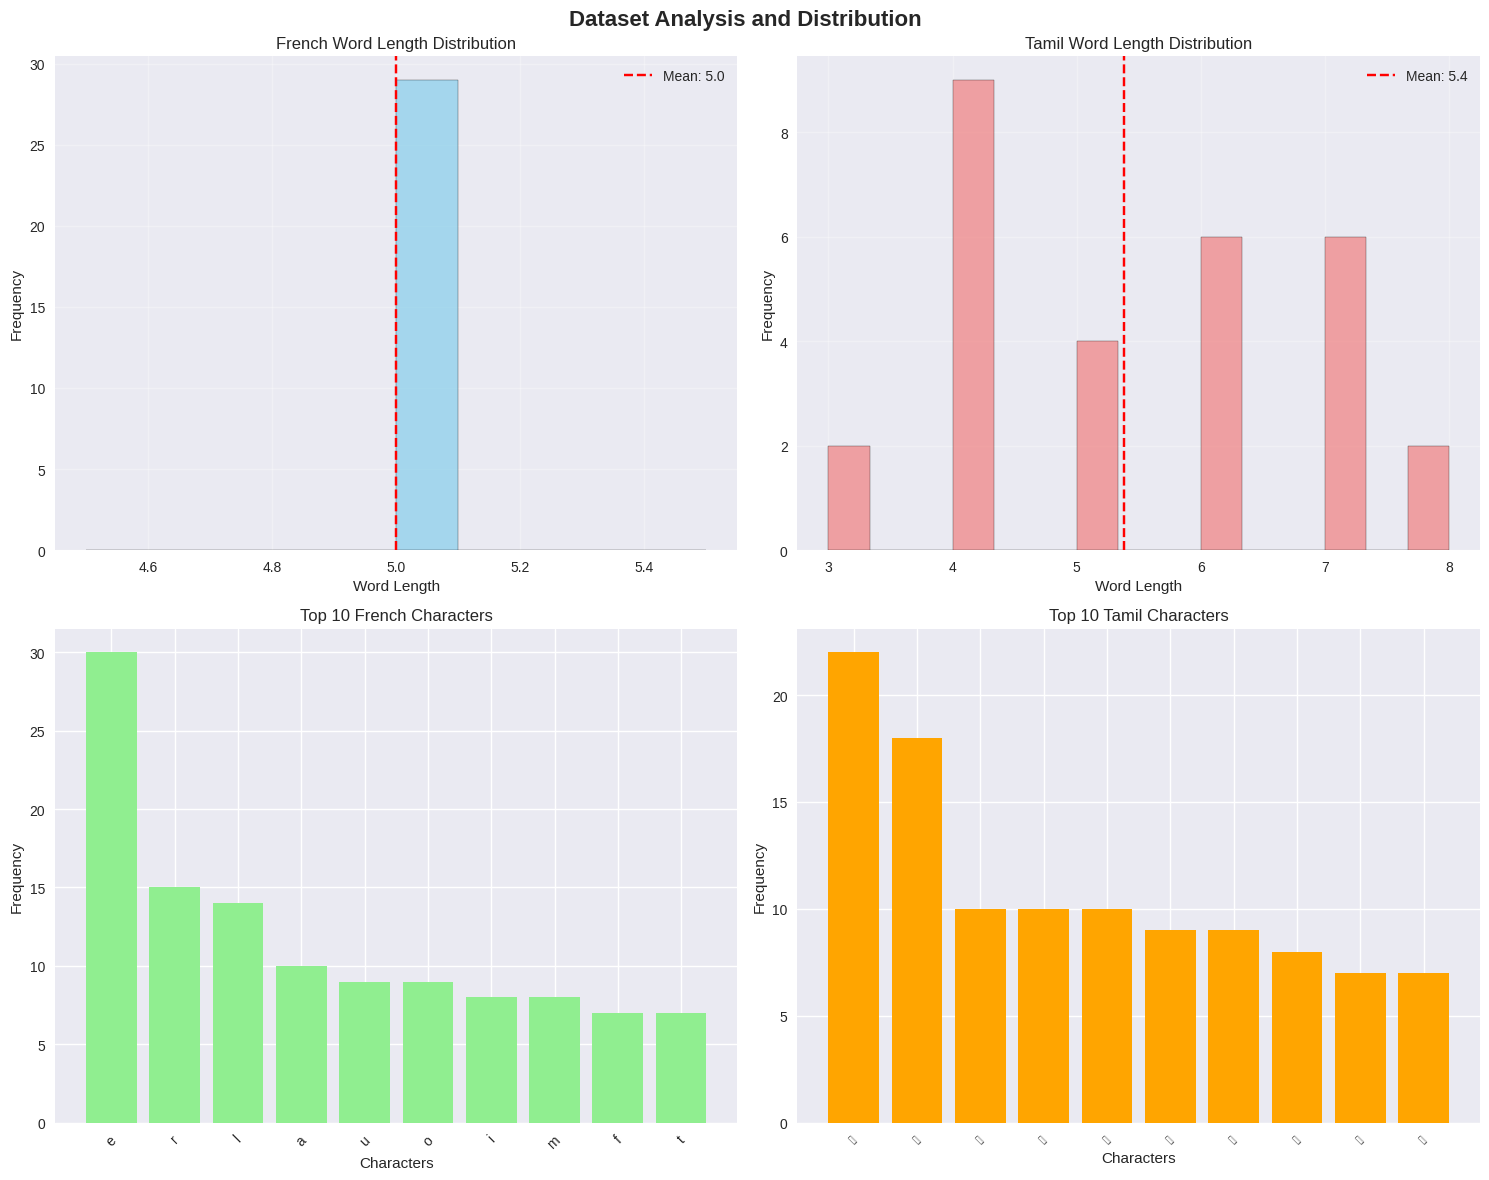

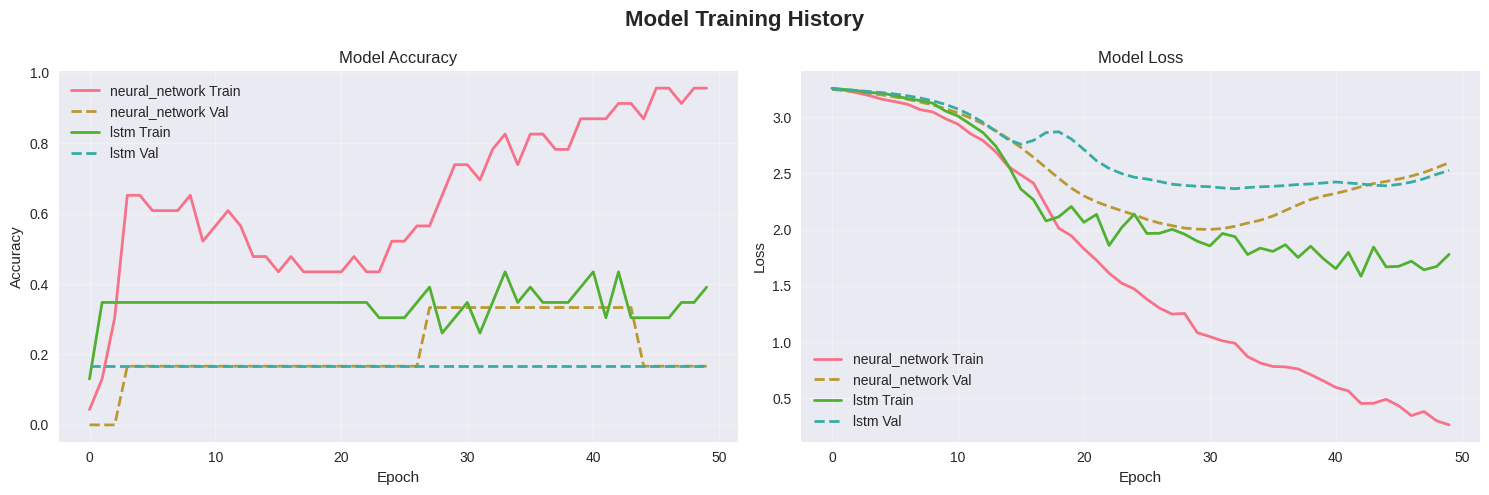

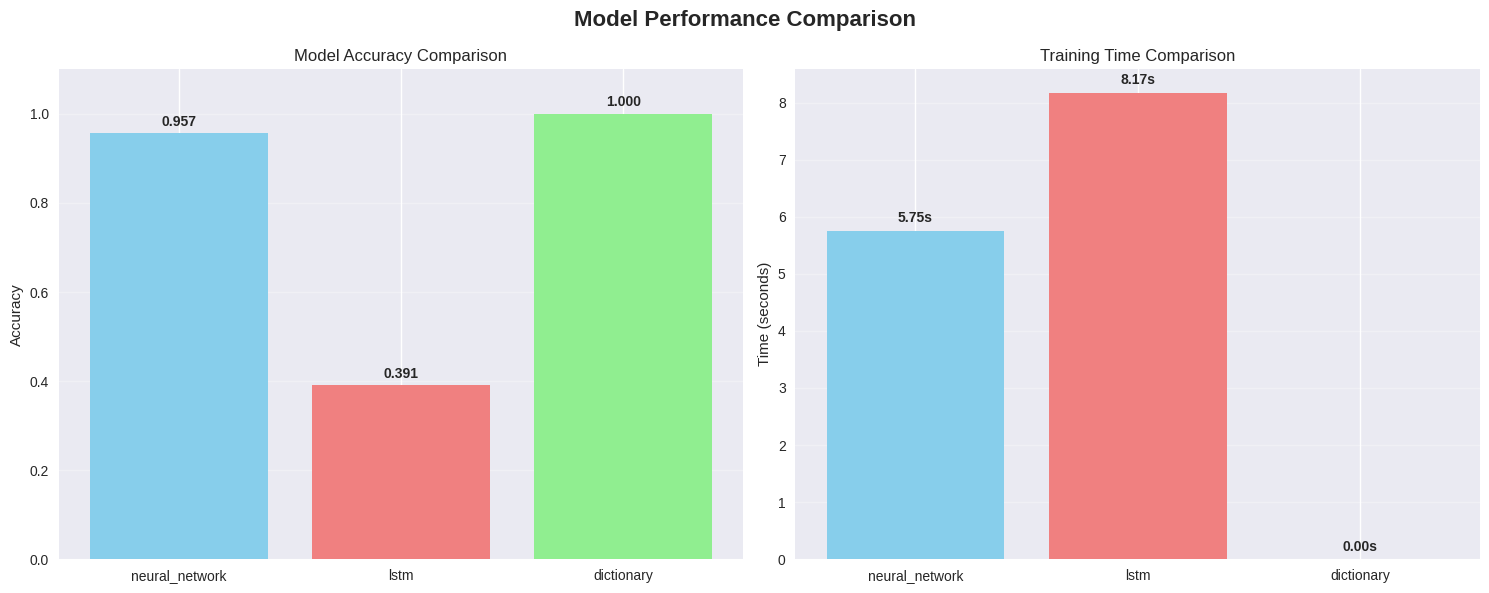


 COMPREHENSIVE PERFORMANCE REPORT

 DATASET SUMMARY:
   • Total word pairs: 29
   • Unique French characters: 20
   • Unique Tamil characters: 26
   • Average French word length: 5.00
   • Average Tamil word length: 5.38

 MODEL PERFORMANCE SUMMARY:

   NEURAL_NETWORK MODEL:
   • Accuracy: 0.9565
   • Validation Accuracy: 0.1667
   • Training Time: 5.75s
   • Final Loss: 0.2636

   LSTM MODEL:
   • Accuracy: 0.3913
   • Validation Accuracy: 0.1667
   • Training Time: 8.17s
   • Final Loss: 1.7804

   DICTIONARY MODEL:
   • Accuracy: 1.0000
   • Validation Accuracy: 1.0000
   • Training Time: 0.00s
   • Final Loss: 0.0000

 INTERACTIVE TRANSLATION INTERFACE
Enter 5-letter French words to translate to Tamil
Commands: 'list' - show all words, 'stats' - show statistics, 'quit' - exit

🇫🇷 Enter French word: quit

 Translation system completed successfully!


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
import json
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)

# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class FrenchTamilDataset:
    """Dataset management for French to Tamil translation using existing files"""

    def __init__(self):
        self.french_words = []
        self.tamil_words = []
        self.dataset = {}

    def load_existing_dataset(self, french_file='/content/french.txt', tamil_file='/content/tamil.txt'):
        """Load dataset from existing french.txt and tamil.txt files"""
        try:
            # Read French words
            with open(french_file, 'r', encoding='utf-8') as f:
                french_lines = [line.strip() for line in f.readlines() if line.strip()]

            # Read Tamil words
            with open(tamil_file, 'r', encoding='utf-8') as f:
                tamil_lines = [line.strip() for line in f.readlines() if line.strip()]

            # Create aligned pairs (assuming files have same number of lines)
            min_length = min(len(french_lines), len(tamil_lines))
            self.french_words = french_lines[:min_length]
            self.tamil_words = tamil_lines[:min_length]

            # Filter for 5-letter French words only
            filtered_pairs = []
            for fr, ta in zip(self.french_words, self.tamil_words):
                if len(fr) == 5 and fr.isalpha():
                    filtered_pairs.append((fr.lower(), ta))

            # Create dataset dictionary
            self.dataset = dict(filtered_pairs)
            self.french_words = list(self.dataset.keys())
            self.tamil_words = list(self.dataset.values())

            print(f" Dataset loaded with {len(self.french_words)} 5-letter French-Tamil pairs")

            # Show sample pairs
            print("\n Sample pairs from your dataset:")
            for i in range(min(10, len(self.french_words))):
                print(f"   {self.french_words[i]} -> {self.tamil_words[i]}")

            return self.dataset

        except FileNotFoundError as e:
            print(f" Error: {e}")
            print("Please ensure 'french.txt' and 'tamil.txt' files exist in the current directory")
            return {}
        except Exception as e:
            print(f" Error loading dataset: {e}")
            return {}

    def analyze_dataset(self):
        """Perform comprehensive dataset analysis"""
        if not self.dataset:
            print(" No dataset loaded. Please load dataset first.")
            return {}

        print("\n" + "="*60)
        print(" DATASET ANALYSIS")
        print("="*60)

        # Basic statistics
        print(f"Total word pairs: {len(self.french_words)}")
        print(f"Unique French words: {len(set(self.french_words))}")
        print(f"Unique Tamil words: {len(set(self.tamil_words))}")

        # Word length analysis
        french_lengths = [len(word) for word in self.french_words]
        tamil_lengths = [len(word) for word in self.tamil_words]

        print(f"\nFrench word length - Mean: {np.mean(french_lengths):.2f}, Std: {np.std(french_lengths):.2f}")
        print(f"Tamil word length - Mean: {np.mean(tamil_lengths):.2f}, Std: {np.std(tamil_lengths):.2f}")

        # Character frequency
        french_chars = ''.join(self.french_words)
        tamil_chars = ''.join(self.tamil_words)

        print(f"\nUnique French characters: {len(set(french_chars))}")
        print(f"Unique Tamil characters: {len(set(tamil_chars))}")

        # Category analysis (if we can infer categories from words)
        self._analyze_word_categories()

        return {
            'total_pairs': len(self.french_words),
            'french_chars': len(set(french_chars)),
            'tamil_chars': len(set(tamil_chars)),
            'french_mean_len': np.mean(french_lengths),
            'tamil_mean_len': np.mean(tamil_lengths)
        }

    def _analyze_word_categories(self):
        """Analyze word categories based on common patterns"""
        categories = {
            'nature': ['arbre', 'fleur', 'terre', 'ciel', 'soleil', 'nuit', 'pluie', 'vent', 'mer', 'feu'],
            'objects': ['livre', 'table', 'porte', 'chaise', 'maison', 'fenet', 'lampe', 'stylo', 'cahier', 'bague'],
            'colors': ['blanc', 'noir', 'rouge', 'vert', 'bleu', 'jaune', 'rose', 'gris', 'brun'],
            'family': ['frere', 'soeur', 'mere', 'pere', 'femme', 'mari', 'fille', 'garcon'],
            'food': ['pomme', 'fruit', 'pain', 'lait', 'fromage', 'viande', 'riz', 'the', 'cafe'],
            'time': ['heure', 'jour', 'mois', 'annee', 'matin', 'soire', 'lundi', 'mardi'],
            'emotions': ['amour', 'joie', 'peur', 'rire', 'colere', 'triste', 'bonheur', 'paix'],
            'places': ['ville', 'rue', 'ecole', 'eglise', 'hopital', 'marche', 'jardin']
        }

        category_counts = {category: 0 for category in categories.keys()}
        uncategorized = 0

        for french_word in self.french_words:
            categorized = False
            for category, keywords in categories.items():
                if any(keyword in french_word for keyword in keywords):
                    category_counts[category] += 1
                    categorized = True
                    break
            if not categorized:
                uncategorized += 1

        print(f"\n Inferred Word Categories:")
        for category, count in category_counts.items():
            if count > 0:
                print(f"   • {category.capitalize()}: {count} words")
        if uncategorized > 0:
            print(f"   • Other: {uncategorized} words")

class TranslationModels:
    """Implementation of different translation models"""

    def __init__(self, dataset):
        self.dataset = dataset
        self.models = {}
        self.results = {}

    def build_dictionary_model(self):
        """Simple dictionary-based model (baseline)"""
        return self.dataset

    def build_neural_network_model(self):
        """Neural network model for character-level translation"""
        if not self.dataset:
            print(" No dataset available for model building")
            return None

        # Character mappings
        french_chars = sorted(set(''.join(self.dataset.keys())))
        tamil_chars = sorted(set(''.join(self.dataset.values())))

        self.french_char_to_idx = {char: idx for idx, char in enumerate(french_chars)}
        self.tamil_char_to_idx = {char: idx for idx, char in enumerate(tamil_chars)}
        self.tamil_idx_to_char = {idx: char for char, idx in self.tamil_char_to_idx.items()}

        # Prepare training data
        X, y = [], []
        for french_word, tamil_word in self.dataset.items():
            # Convert to numerical representation
            french_vec = [self.french_char_to_idx.get(char, 0) for char in french_word]
            X.append(french_vec)

            # Use first character of Tamil word for simplicity
            if tamil_word and len(tamil_word) > 0:
                tamil_vec = self.tamil_char_to_idx.get(tamil_word[0], 0)
                y.append(tamil_vec)

        if not X or not y:
            print(" No valid training data available")
            return None

        X = np.array(X)
        y = np.array(y)

        # Build neural network
        model = keras.Sequential([
            layers.Embedding(input_dim=len(french_chars)+1, output_dim=32, input_length=5),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(tamil_chars), activation='softmax')
        ])

        model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

        self.models['neural_network'] = model
        self.training_data = (X, y)

        print(f" Neural Network Model Built:")
        print(f"   • Input shape: {X.shape}")
        print(f"   • French characters: {len(french_chars)}")
        print(f"   • Tamil characters: {len(tamil_chars)}")

        return model

    def build_lstm_model(self):
        """LSTM-based model for sequence translation"""
        if not hasattr(self, 'french_char_to_idx'):
            print(" Character mappings not available. Build neural network model first.")
            return None

        french_chars = sorted(set(''.join(self.dataset.keys())))
        tamil_chars = sorted(set(''.join(self.dataset.values())))

        # Prepare sequence data
        X, y = [], []
        for french_word, tamil_word in self.dataset.items():
            french_vec = [self.french_char_to_idx.get(char, 0) for char in french_word]
            X.append(french_vec)

            # Use first character for classification
            if tamil_word and len(tamil_word) > 0:
                tamil_vec = self.tamil_char_to_idx.get(tamil_word[0], 0)
                y.append(tamil_vec)

        X = np.array(X)
        y = np.array(y)

        # Build LSTM model
        model = keras.Sequential([
            layers.Embedding(input_dim=len(french_chars)+1, output_dim=32, input_length=5),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(32),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(len(tamil_chars), activation='softmax')
        ])

        model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

        self.models['lstm'] = model

        print(f" LSTM Model Built:")
        print(f"   • Input shape: {X.shape}")
        print(f"   • LSTM layers: 2")

        return model

    def train_models(self, epochs=50):
        """Train all models and record performance"""
        print("\n" + "="*60)
        print(" MODEL TRAINING")
        print("="*60)

        if not hasattr(self, 'training_data'):
            print(" No training data available")
            return

        X, y = self.training_data

        # Split data for training and validation
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        for model_name, model in self.models.items():
            if model_name != 'dictionary':
                print(f"\nTraining {model_name}...")
                start_time = time.time()

                history = model.fit(X_train, y_train,
                                  epochs=epochs,
                                  batch_size=16,
                                  verbose=0,
                                  validation_data=(X_val, y_val))

                training_time = time.time() - start_time

                # Store results
                self.results[model_name] = {
                    'history': history.history,
                    'training_time': training_time,
                    'final_accuracy': history.history['accuracy'][-1],
                    'final_val_accuracy': history.history['val_accuracy'][-1],
                    'final_loss': history.history['loss'][-1],
                    'final_val_loss': history.history['val_loss'][-1]
                }

                print(f" {model_name} trained in {training_time:.2f}s")
                print(f"   Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
                print(f"   Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
                print(f"   Final Training Loss: {history.history['loss'][-1]:.4f}")

    def evaluate_models(self):
        """Comprehensive model evaluation"""
        print("\n" + "="*60)
        print(" MODEL EVALUATION")
        print("="*60)

        if not hasattr(self, 'training_data'):
            print(" No training data available for evaluation")
            return

        X, y = self.training_data

        for model_name in self.models:
            if model_name == 'dictionary':
                # Dictionary model evaluation
                correct = 0
                total = len(self.dataset)

                for french_word, true_tamil in self.dataset.items():
                    predicted = self.dataset.get(french_word)
                    if predicted == true_tamil:
                        correct += 1

                accuracy = correct / total
                self.results['dictionary'] = {
                    'accuracy': accuracy,
                    'training_time': 0,
                    'final_accuracy': accuracy,
                    'final_val_accuracy': accuracy,
                    'final_loss': 0,
                    'final_val_loss': 0
                }

                print(f" Dictionary Model:")
                print(f"   Accuracy: {accuracy:.4f}")
                print(f"   Training Time: 0s (pre-defined)")

            else:
                # Neural network models evaluation
                model = self.models[model_name]
                loss, accuracy = model.evaluate(X, y, verbose=0)

                print(f" {model_name.upper()} Model:")
                print(f"   Accuracy: {accuracy:.4f}")
                print(f"   Loss: {loss:.4f}")
                print(f"   Training Time: {self.results[model_name]['training_time']:.2f}s")

class Visualization:
    """Visualization and reporting class"""

    def __init__(self, dataset, models):
        self.dataset = dataset
        self.models = models

    def plot_dataset_distribution(self):
        """Plot dataset characteristics"""
        if not self.dataset.french_words:
            print(" No dataset available for visualization")
            return

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Dataset Analysis and Distribution', fontsize=16, fontweight='bold')

        # Word length distribution
        french_lengths = [len(word) for word in self.dataset.french_words]
        tamil_lengths = [len(word) for word in self.dataset.tamil_words]

        axes[0, 0].hist(french_lengths, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('French Word Length Distribution')
        axes[0, 0].set_xlabel('Word Length')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].axvline(np.mean(french_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(french_lengths):.1f}')
        axes[0, 0].legend()

        axes[0, 1].hist(tamil_lengths, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[0, 1].set_title('Tamil Word Length Distribution')
        axes[0, 1].set_xlabel('Word Length')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].axvline(np.mean(tamil_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(tamil_lengths):.1f}')
        axes[0, 1].legend()

        # Character frequency
        french_chars = Counter(''.join(self.dataset.french_words))
        tamil_chars = Counter(''.join(self.dataset.tamil_words))

        french_top_chars = dict(sorted(french_chars.items(), key=lambda x: x[1], reverse=True)[:10])
        tamil_top_chars = dict(sorted(tamil_chars.items(), key=lambda x: x[1], reverse=True)[:10])

        axes[1, 0].bar(french_top_chars.keys(), french_top_chars.values(), color='lightgreen')
        axes[1, 0].set_title('Top 10 French Characters')
        axes[1, 0].set_xlabel('Characters')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].tick_params(axis='x', rotation=45)

        axes[1, 1].bar(tamil_top_chars.keys(), tamil_top_chars.values(), color='orange')
        axes[1, 1].set_title('Top 10 Tamil Characters')
        axes[1, 1].set_xlabel('Characters')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    def plot_training_history(self, results):
        """Plot training history for neural models"""
        neural_models = {k: v for k, v in results.items() if k != 'dictionary'}

        if not neural_models:
            print(" No neural model results available for visualization")
            return

        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('Model Training History', fontsize=16, fontweight='bold')

        for model_name, result in neural_models.items():
            history = result['history']

            # Plot accuracy
            axes[0].plot(history['accuracy'], label=f'{model_name} Train', linewidth=2)
            if 'val_accuracy' in history:
                axes[0].plot(history['val_accuracy'], label=f'{model_name} Val', linestyle='--', linewidth=2)

            # Plot loss
            axes[1].plot(history['loss'], label=f'{model_name} Train', linewidth=2)
            if 'val_loss' in history:
                axes[1].plot(history['val_loss'], label=f'{model_name} Val', linestyle='--', linewidth=2)

        axes[0].set_title('Model Accuracy')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Accuracy')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        axes[1].set_title('Model Loss')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Loss')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_model_comparison(self, results):
        """Compare model performance"""
        if not results:
            print(" No results available for comparison")
            return

        models = list(results.keys())
        accuracies = [results[model]['final_accuracy'] for model in models]
        training_times = [results[model]['training_time'] for model in models]

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

        # Accuracy comparison
        colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink']
        bars1 = axes[0].bar(models, accuracies, color=colors[:len(models)])
        axes[0].set_title('Model Accuracy Comparison')
        axes[0].set_ylabel('Accuracy')
        axes[0].set_ylim(0, 1.1)
        axes[0].grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

        # Training time comparison
        bars2 = axes[1].bar(models, training_times, color=colors[:len(models)])
        axes[1].set_title('Training Time Comparison')
        axes[1].set_ylabel('Time (seconds)')
        axes[1].grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar in bars2:
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{height:.2f}s', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

    def generate_report(self, results, dataset_analysis):
        """Generate comprehensive performance report"""
        print("\n" + "="*80)
        print(" COMPREHENSIVE PERFORMANCE REPORT")
        print("="*80)

        print("\n DATASET SUMMARY:")
        print(f"   • Total word pairs: {dataset_analysis['total_pairs']}")
        print(f"   • Unique French characters: {dataset_analysis['french_chars']}")
        print(f"   • Unique Tamil characters: {dataset_analysis['tamil_chars']}")
        print(f"   • Average French word length: {dataset_analysis['french_mean_len']:.2f}")
        print(f"   • Average Tamil word length: {dataset_analysis['tamil_mean_len']:.2f}")

        print("\n MODEL PERFORMANCE SUMMARY:")
        for model_name, result in results.items():
            print(f"\n   {model_name.upper()} MODEL:")
            print(f"   • Accuracy: {result['final_accuracy']:.4f}")
            if 'final_val_accuracy' in result:
                print(f"   • Validation Accuracy: {result['final_val_accuracy']:.4f}")
            print(f"   • Training Time: {result['training_time']:.2f}s")
            if 'final_loss' in result:
                print(f"   • Final Loss: {result['final_loss']:.4f}")

class FrenchTamilTranslator:
    """Main translation system using existing dataset files"""

    def __init__(self):
        self.dataset_manager = FrenchTamilDataset()
        self.models = None
        self.visualizer = None
        self.results = {}

    def run_complete_pipeline(self):
        """Run the complete translation pipeline using existing files"""
        print(" FRENCH TO TAMIL TRANSLATION SYSTEM")
        print("="*60)
        print(" Using existing dataset files: french.txt and tamil.txt")
        print("="*60)

        # Step 1: Load existing dataset
        dataset = self.dataset_manager.load_existing_dataset()
        if not dataset:
            print(" Failed to load dataset. Please check your files.")
            return {}

        dataset_analysis = self.dataset_manager.analyze_dataset()

        # Step 2: Build and train models
        self.models = TranslationModels(dataset)

        # Build models
        dict_model = self.models.build_dictionary_model()
        nn_model = self.models.build_neural_network_model()
        lstm_model = self.models.build_lstm_model()

        if not nn_model:
            print(" Failed to build neural network models")
            return {}

        self.models.models['dictionary'] = dict_model
        self.models.models['neural_network'] = nn_model
        self.models.models['lstm'] = lstm_model

        # Train models
        self.models.train_models(epochs=50)

        # Step 3: Evaluate models
        self.models.evaluate_models()
        self.results = self.models.results

        # Step 4: Visualizations
        self.visualizer = Visualization(self.dataset_manager, self.models)

        print("\n" + "="*60)
        print(" GENERATING VISUALIZATIONS")
        print("="*60)

        self.visualizer.plot_dataset_distribution()
        self.visualizer.plot_training_history(self.results)
        self.visualizer.plot_model_comparison(self.results)
        self.visualizer.generate_report(self.results, dataset_analysis)

        return self.results

    def interactive_translation(self):
        """Interactive translation interface"""
        if not self.dataset_manager.dataset:
            print(" No dataset loaded. Please run the pipeline first.")
            return

        print("\n" + "="*60)
        print(" INTERACTIVE TRANSLATION INTERFACE")
        print("="*60)
        print("Enter 5-letter French words to translate to Tamil")
        print("Commands: 'list' - show all words, 'stats' - show statistics, 'quit' - exit\n")

        while True:
            user_input = input("🇫🇷 Enter French word: ").strip().lower()

            if user_input == 'quit':
                break
            elif user_input == 'list':
                print(f"\n Available French words ({len(self.dataset_manager.french_words)} total):")
                words = self.dataset_manager.french_words
                for i in range(0, len(words), 10):
                    print("   ".join(words[i:i+10]))
                print()
                continue
            elif user_input == 'stats':
                self.dataset_manager.analyze_dataset()
                continue

            if len(user_input) != 5 or not user_input.isalpha():
                print(" Please enter exactly 5 alphabetic characters\n")
                continue

            translation = self.dataset_manager.dataset.get(user_input)
            if translation:
                print(f" Translation: {translation}\n")

                # Show model predictions if available
                if hasattr(self.models, 'neural_network'):
                    try:
                        # Neural network prediction
                        french_vec = [self.models.french_char_to_idx.get(char, 0) for char in user_input]
                        prediction = self.models.models['neural_network'].predict(np.array([french_vec]), verbose=0)
                        predicted_idx = np.argmax(prediction[0])
                        predicted_char = self.models.tamil_idx_to_char.get(predicted_idx, '?')
                        print(f" Neural Network predicts first character: '{predicted_char}'")
                    except:
                        pass
            else:
                print(f" No translation found for '{user_input}'\n")

# Run the complete system
if __name__ == "__main__":
    # Initialize and run the translation system
    translator = FrenchTamilTranslator()

    # Run complete pipeline
    results = translator.run_complete_pipeline()

    # Start interactive translation if pipeline was successful
    if results:
        translator.interactive_translation()
        print("\n Translation system completed successfully!")
    else:
        print("\n Translation system failed. Please check your dataset files.")